Implemented by Muhammad Hanan Asghar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

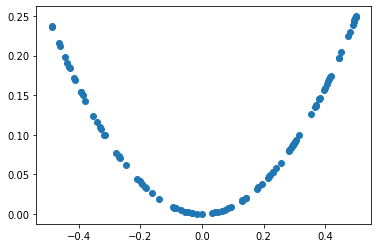

In [2]:
def generate_samples(n=100):
  X1 = np.random.rand(n) - 0.5
  X2 = X1 * X1
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  return np.hstack((X1, X2))

data = generate_samples()
plt.scatter(data[:, 0], data[:, 1])
plt.show()

#Discriminator

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [4]:
def define_discriminator(n_inputs=2):
  model = Sequential()
  model.add(Dense(25, activation="relu", kernel_initializer="he_uniform",
                  input_dim=n_inputs))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

In [5]:
model = define_discriminator()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [7]:
def generate_real_samples(n): #[-0.5, 0.5], # = 1
  X1 = np.random.rand(n) - 0.5 #inputs
  X2 = X1 * X1 #outpus
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = np.hstack((X1, X2))
  y = np.ones((n, 1))
  return X, y

In [8]:
def generate_fake_samples(n): #[-1, 1], # = 0
  X1 = -1 + np.random.rand(n) * 2 # inputs
  X2 = -1 + np.random.rand(n) * 2 # outpus
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = np.hstack((X1, X2))
  y = np.zeros((n, 1))
  return X, y

In [9]:
def train_discriminator(model, n_epochs=1000, n_batch=128):
  half_batch = int(n_batch / 2)
  for i in range(n_epochs):
    # generate real examples
    X_real, y_real = generate_real_samples(half_batch)
    # train model on real values
    model.train_on_batch(X_real, y_real)
    # generate fake examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # train model on fake values
    model.train_on_batch(X_fake, y_fake)

    _, acc_real = model.evaluate(X_real, y_real, verbose=0)
    _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    print(i, acc_real, acc_fake)

model = define_discriminator()
train_discriminator(model)

0 0.578125 0.640625
1 0.578125 0.5
2 0.53125 0.515625
3 0.5 0.515625
4 0.65625 0.625
5 0.546875 0.515625
6 0.46875 0.515625
7 0.5 0.671875
8 0.515625 0.578125
9 0.421875 0.5625
10 0.546875 0.640625
11 0.375 0.4375
12 0.515625 0.5
13 0.4375 0.546875
14 0.515625 0.546875
15 0.46875 0.546875
16 0.453125 0.484375
17 0.515625 0.609375
18 0.5 0.546875
19 0.59375 0.5625
20 0.53125 0.65625
21 0.484375 0.53125
22 0.546875 0.703125
23 0.59375 0.578125
24 0.484375 0.59375
25 0.59375 0.546875
26 0.53125 0.578125
27 0.375 0.59375
28 0.46875 0.59375
29 0.4375 0.65625
30 0.546875 0.703125
31 0.53125 0.578125
32 0.46875 0.578125
33 0.5625 0.703125
34 0.5 0.78125
35 0.609375 0.703125
36 0.390625 0.640625
37 0.59375 0.640625
38 0.578125 0.640625
39 0.515625 0.71875
40 0.515625 0.671875
41 0.34375 0.75
42 0.5 0.703125
43 0.671875 0.625
44 0.546875 0.765625
45 0.46875 0.59375
46 0.578125 0.640625
47 0.5 0.765625
48 0.515625 0.65625
49 0.4375 0.71875
50 0.5625 0.578125
51 0.53125 0.71875
52 0.515625 0.6875

#Generator

In [10]:
def define_generator(latent_dim, n_outputs=2):
  model = Sequential()
  model.add(Dense(15, activation="relu", kernel_initializer="he_uniform",
                  input_dim=latent_dim))
  model.add(Dense(n_outputs, activation="linear"))
  return model

In [11]:
model = define_generator(5)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                90        
                                                                 
 dense_5 (Dense)             (None, 2)                 32        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [12]:
def generate_latent_points(latent_dim, n):
  x_input = np.random.randn(latent_dim * n)
  x_input = x_input.reshape(n, latent_dim)
  return x_input

In [ ]:
def generate_fake_samples_g(generator, latent_dim, n):
  x_input = generate_latent_points(latent_dim, n)
  x = generator.predict(x_input)
  return x, np.zeros((n, 1))

latent_dim = 5
model = define_generator(5)
generate_fake_samples_g(model, 5, 100)

In [17]:
def define_gan(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  model.compile(loss="binary_crossentropy", optimizer="adam")
  return model

In [18]:
latent_dim = 5
generator = define_generator(latent_dim)
discriminator = define_discriminator()
gan_model = define_gan(generator, discriminator)
gan_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 2)                 122       
                                                                 
 sequential_8 (Sequential)   (None, 1)                 101       
                                                                 
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


In [20]:
def summarize(epoch, generator, discriminator, latent_dim, n=100):
  x_real, y_real = generate_real_samples(n)
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
  x_fake, y_fake = generate_fake_samples_g(generator, latent_dim, n )
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
  plt.scatter(x_real[:, 0], x_real[:, 1], color="red")
  plt.scatter(x_fake[:, 0], x_fake[:, 1], color="blue") 

In [27]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
  half_batch = n_batch // 2
  for i in range(n_epochs):
    x_real, y_real = generate_real_samples(half_batch)
    x_fake, y_fake = generate_fake_samples_g(g_model, latent_dim, half_batch)
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)
    x_gan = generate_latent_points(latent_dim, n_batch)
    y_gan = np.ones((n_batch, 1))
    gan_model.train_on_batch(x_gan, y_gan)
    if (i+1) % 2000 == 0:
      summarize(i, g_model, d_model, latent_dim)
    print("Epoch: "+str(i))

Streaming output truncated to the last 5000 lines.
Epoch: 5003
Epoch: 5004
Epoch: 5005
Epoch: 5006
Epoch: 5007
Epoch: 5008
Epoch: 5009
Epoch: 5010
Epoch: 5011
Epoch: 5012
Epoch: 5013
Epoch: 5014
Epoch: 5015
Epoch: 5016
Epoch: 5017
Epoch: 5018
Epoch: 5019
Epoch: 5020
Epoch: 5021
Epoch: 5022
Epoch: 5023
Epoch: 5024
Epoch: 5025
Epoch: 5026
Epoch: 5027
Epoch: 5028
Epoch: 5029
Epoch: 5030
Epoch: 5031
Epoch: 5032
Epoch: 5033
Epoch: 5034
Epoch: 5035
Epoch: 5036
Epoch: 5037
Epoch: 5038
Epoch: 5039
Epoch: 5040
Epoch: 5041
Epoch: 5042
Epoch: 5043
Epoch: 5044
Epoch: 5045
Epoch: 5046
Epoch: 5047
Epoch: 5048
Epoch: 5049
Epoch: 5050
Epoch: 5051
Epoch: 5052
Epoch: 5053
Epoch: 5054
Epoch: 5055
Epoch: 5056
Epoch: 5057
Epoch: 5058
Epoch: 5059
Epoch: 5060
Epoch: 5061
Epoch: 5062
Epoch: 5063
Epoch: 5064
Epoch: 5065
Epoch: 5066
Epoch: 5067
Epoch: 5068
Epoch: 5069
Epoch: 5070
Epoch: 5071
Epoch: 5072
Epoch: 5073
Epoch: 5074
Epoch: 5075
Epoch: 5076
Epoch: 5077
Epoch: 5078
Epoch: 5079
Epoch: 5080
Epoch: 5081
E

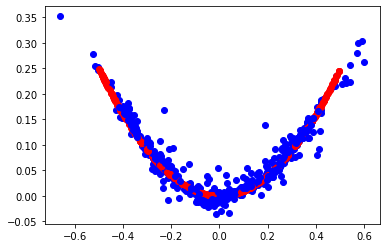

In [28]:
latent_dim = 5
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
train(generator, discriminator, gan_model, latent_dim)

Hahahahaha.......